In [1]:
import os
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
import scanpy as sc

import tacco as tc
import pareto_interactions_py as P


# Fig4 - analysis of mapped sc

Analysis of projected single-cell fibroblasts (Muhl et al.) onto spatially-informed Slide-seq fibroblasts (Avraham-Davidi et al.). Looking at spatial organization of scRNA-seq in terms of:
- task spatial organization
- quantification of correspondence between task and spatial distances
- ligand-receptor predicted expression

In [2]:
save = True
data = 'sc_onto_slideseq'
puck = '20'
outdir = '../output/'

# define small zoom-in region
datadir = outdir
xmin, xmax = (4000,4500)
ymin, ymax = (3300,4500)#(1500,4800)#

def get_zoomed_flipped_adata(adata):
    sadata = adata[(adata.obs['x'] > xmin) & (adata.obs['x'] < xmax) & (adata.obs['y'] > ymin) & (adata.obs['y'] < ymax) ].copy()
    sadata.obs['x_org'] = sadata.obs['x'].copy()
    sadata.obs['y_org'] = sadata.obs['y'].copy()
    sadata.obs['x'] = sadata.obs['y_org']
    sadata.obs['y'] = -sadata.obs['x_org']
    return sadata

In [3]:
# plot configs

# tasks
colors_tasks = {'task 1': 'red', 
                'task 2':'blue', 
                'task 3': 'lime', 
                'task 4': 'yellow', 
                'task 5': 'purple'}

# ligand receptor expression
cmap_lr = 'RdGy'

# visualization configs
s_config = {'joint': True, 'point_size': 30, 'noticks': True}
config = {'joint': True, 'point_size': 5}

/Users/nomo/opt/miniconda3/envs/pareto_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/nomo/opt/miniconda3/envs/pareto_env/lib/python3.10/site-packages/tacco/plots/_plots.py:624: RuntimeWarning: invalid value encountered in divide
  weights = weights / weights.sum(axis=-1)[...,None]
/Users/nomo/opt/miniconda3/envs/pareto_env/lib/python3.10/site-packages/tacco/plots/_plots.py:624: RuntimeWarning: invalid value encountered in divide
  weights = weights / weights.sum(axis=-1)[...,None]


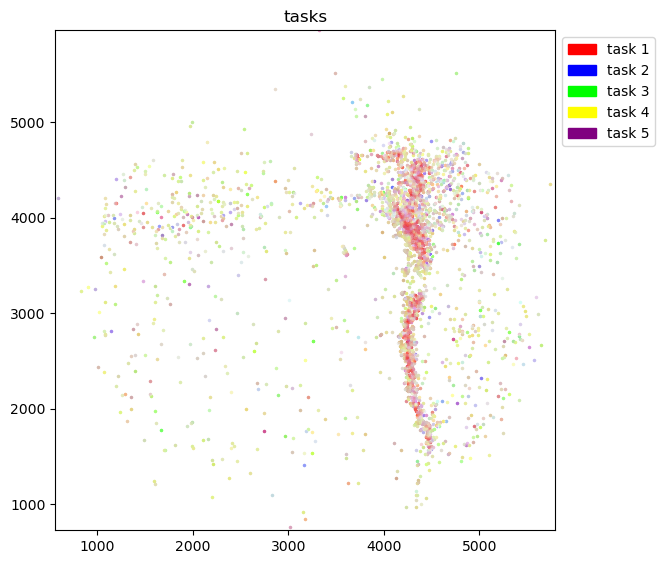

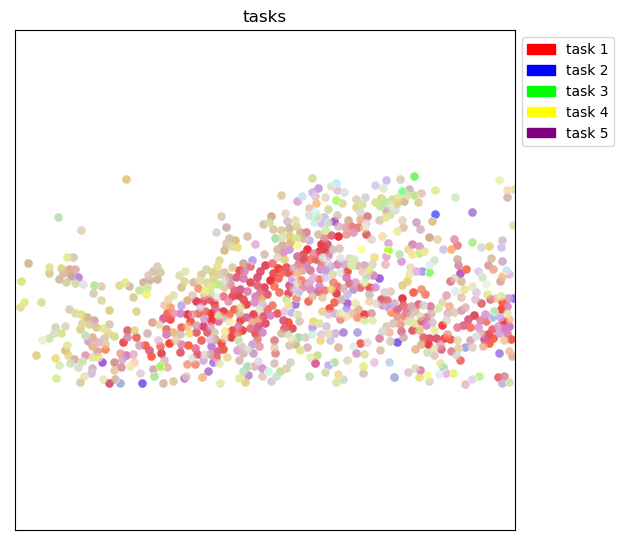

In [4]:
# read data
adata = sc.read(os.path.join(datadir, f'sc_on_ss_pred_adata_{puck}.h5'))
genenames = adata.var_names

sadata = get_zoomed_flipped_adata(adata)
tc.pl.scatter(adata, colors=colors_tasks, keys='tasks', **config);
tc.pl.scatter(sadata, colors=colors_tasks, keys='tasks', **s_config);

### Correlation of task distances vs physical distances

In [5]:
# compute correlation of pairwise task and spatial distances
n_shuff = 1000
comp_null = True

G = adata.obsm['tasks'].values
L = adata.obs[['x','y']].values
p = P.pl.plot_task_phys(G, L, comp_null=comp_null, n_shuff=n_shuff)

p.display()
if save:
    p.save(os.path.join(outdir, f'pairs_dist_{data}.png'), scale_factor=5)
 

corr: -0.05
pval: 1.00000


/Users/nomo/opt/miniconda3/envs/pareto_env/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

### Ligand Receptor

Analysis of single pairs

In [6]:
l = 'Dll1'
r = 'Notch2'
col = 'LR'
adata.obs[col] = (np.log(adata[:,l].X.toarray()) - np.log(adata[:,r].X.toarray()))



/Users/nomo/opt/miniconda3/envs/pareto_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


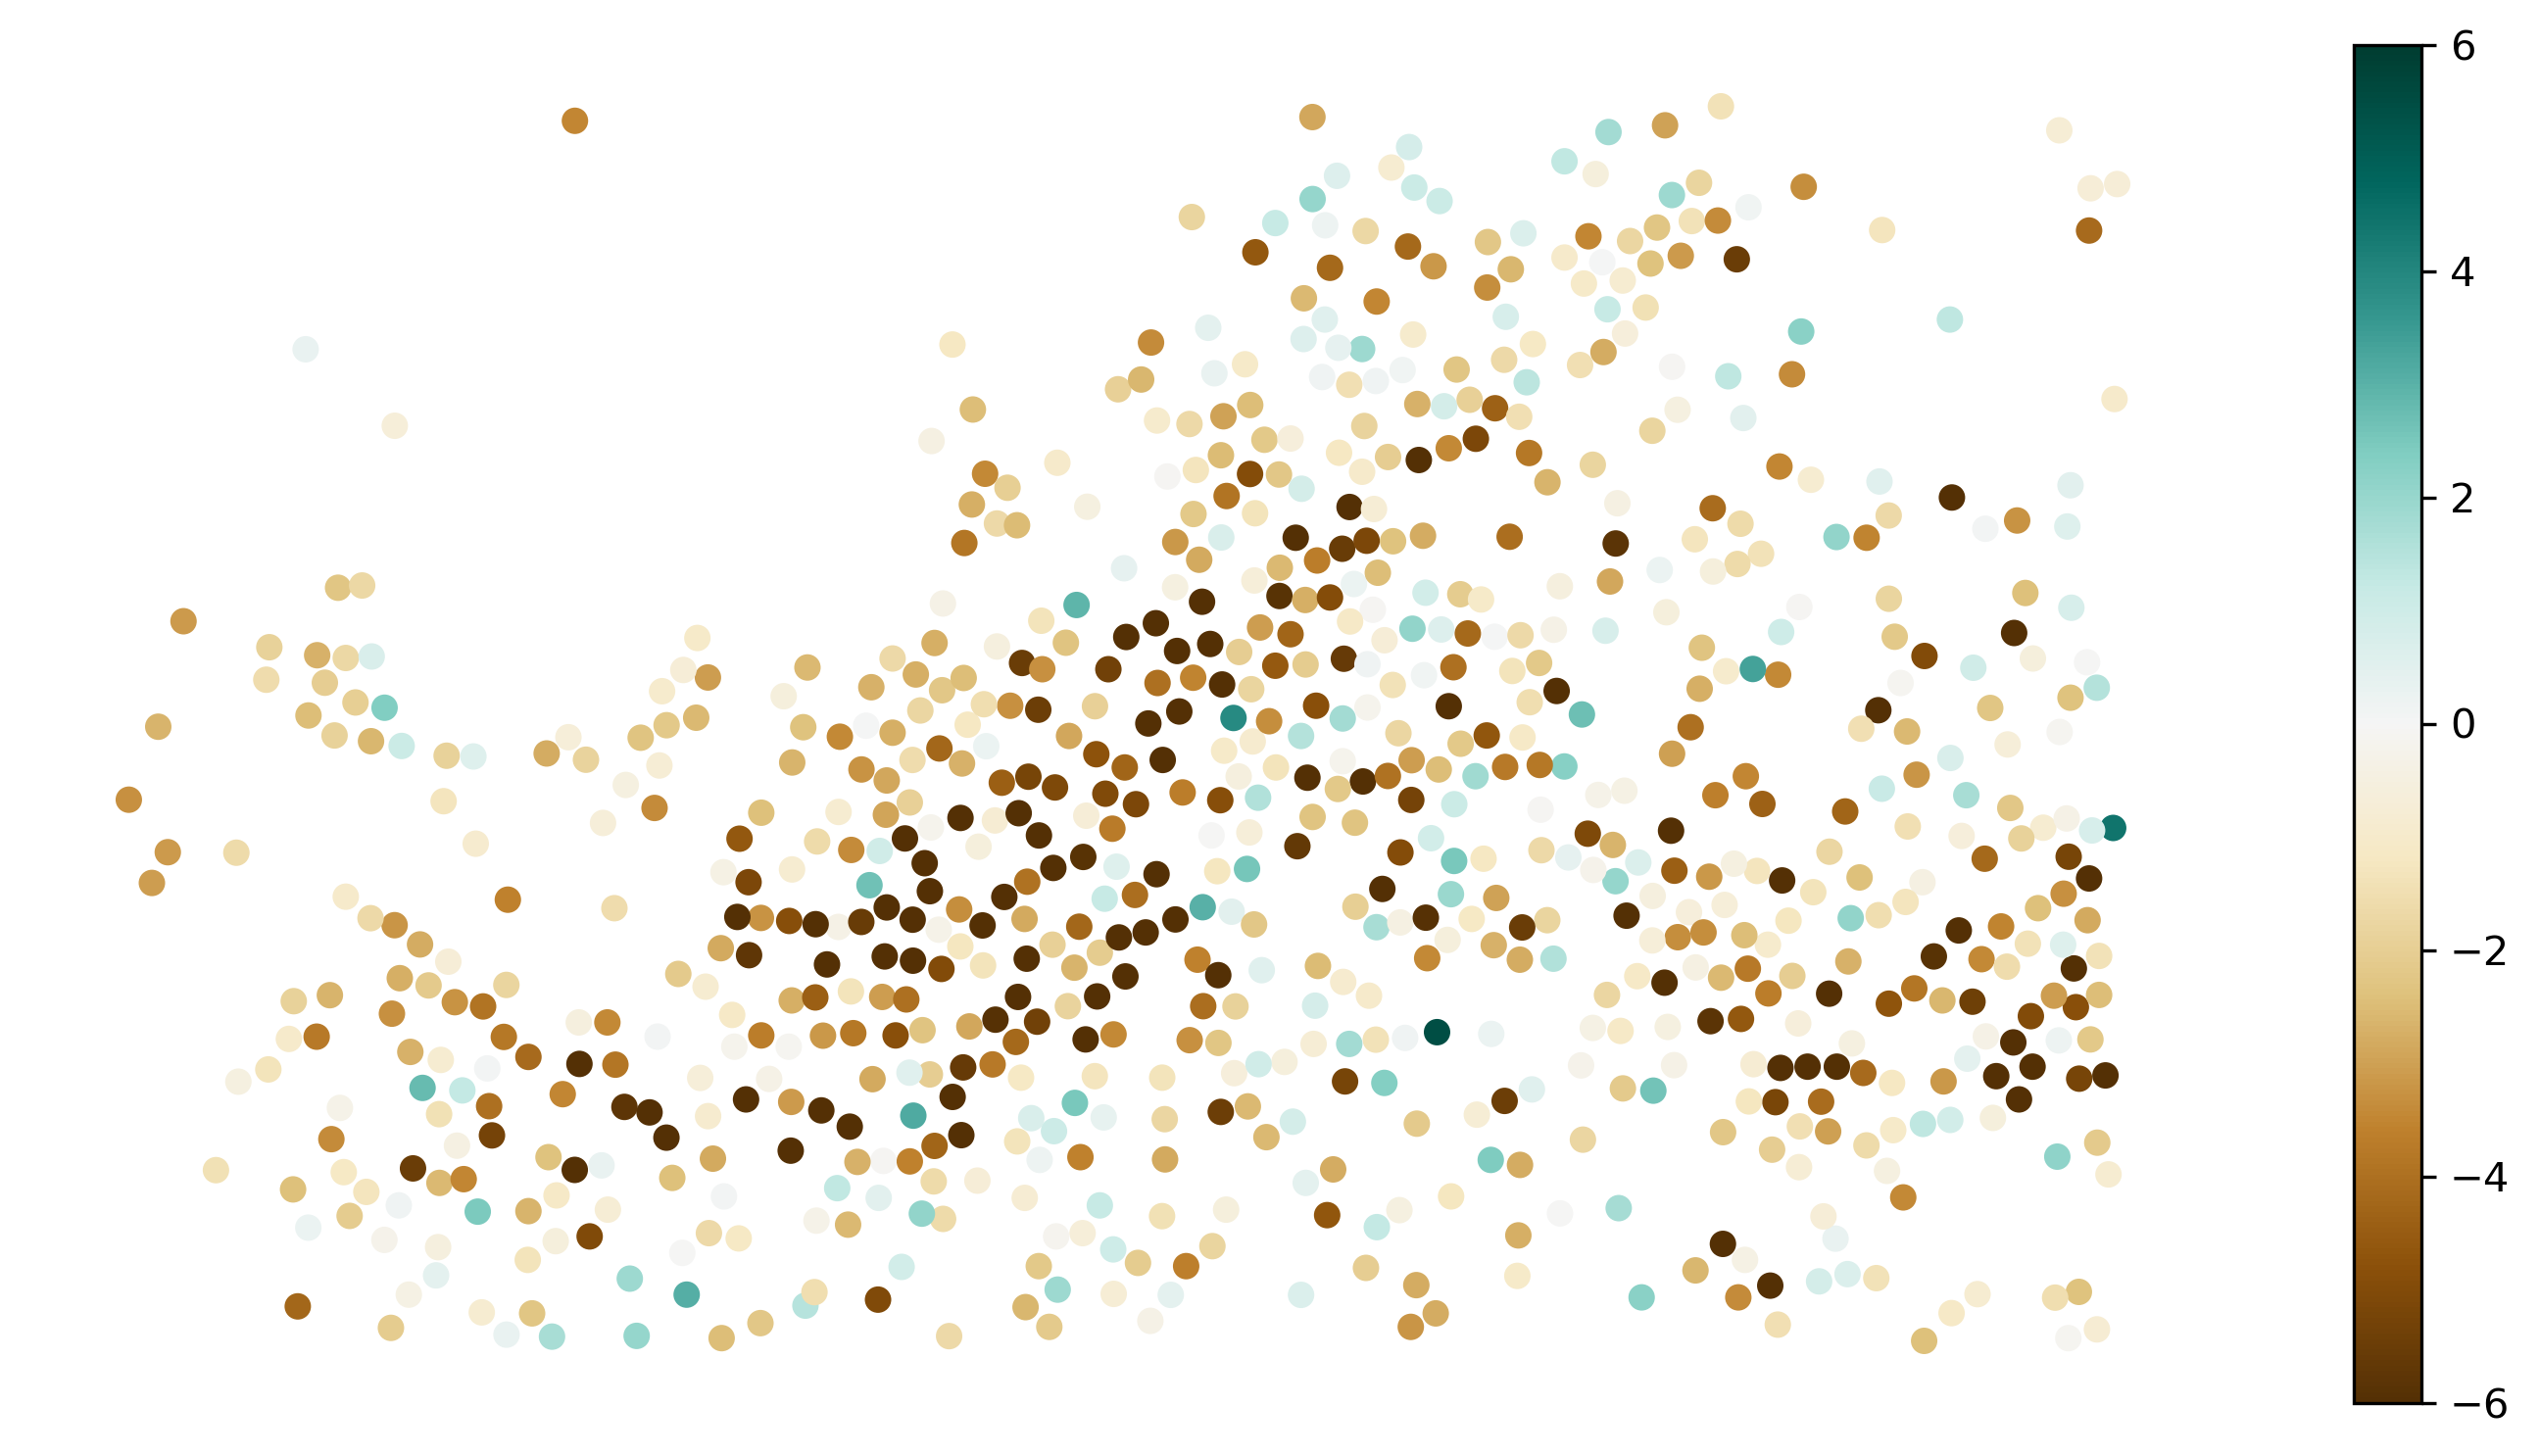

In [10]:
sadata = get_zoomed_flipped_adata(adata)
plt.figure(figsize=[12,6], dpi=300)
range=6
plt.scatter(sadata.obs['x'], sadata.obs['y'], c=sadata.obs[col], cmap='BrBG', s=30, label=col, vmin=-range, vmax=range) #vmin=-6, vmax=6)
plt.axis('off')
plt.title(f'Log ratio of ligand: {l}, receptor: {r}')
# plt.legend()
plt.colorbar()
if save: 
    plt.savefig(os.path.join(outdir, f'{data}_deltanotch2.png'), bbox_inches='tight')
plt.show()